In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#pip install keras

In [4]:
#pip install tensorflow

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [7]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

In [8]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris() 
X = iris.data 
target = iris.target 
names = iris.target_names

In [10]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
#Counting the variables in Target Column

df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
#Checking for missing values

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

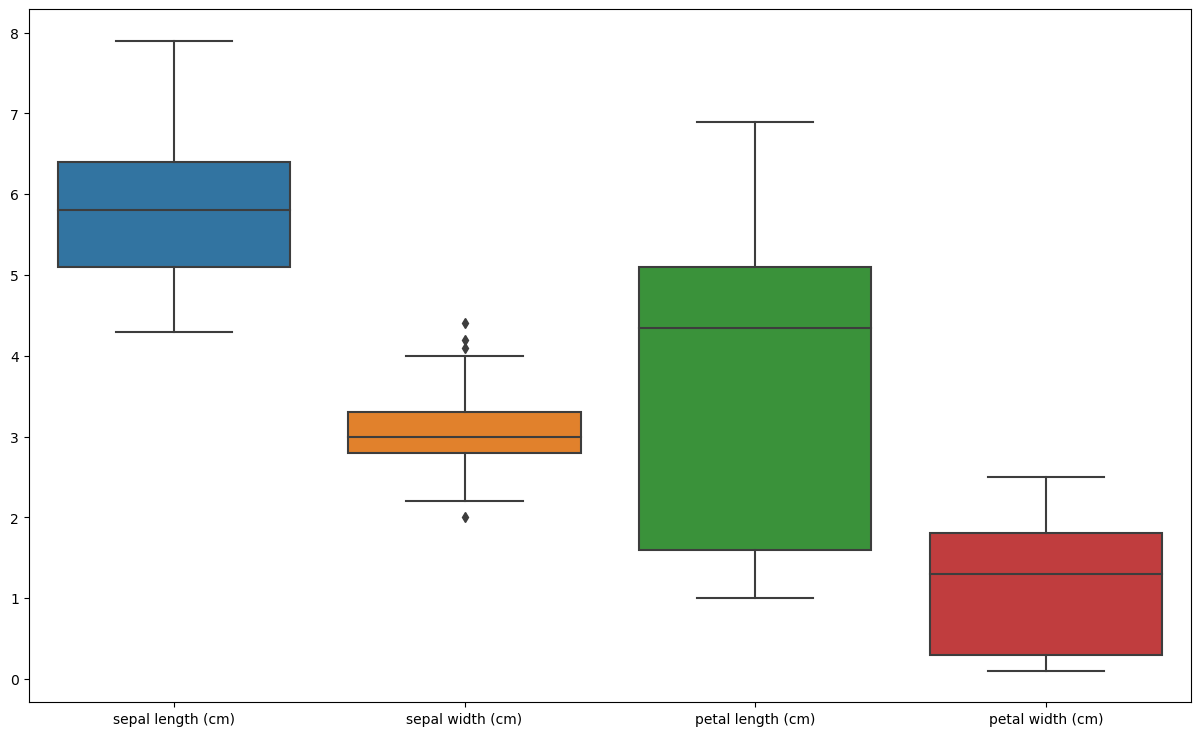

In [14]:
#Checking for outliers

plt.figure(figsize=[15,9])
sns.boxplot(data=df)
plt.show()

In [15]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [16]:
#Replacing the outlier in sepal width column with lower and upper limit

cols=['sepal width (cm)']

def boundaries(data,variable):
    LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

for col in cols:
    LL,UL=boundaries(df,col)
    
    df[col]=np.where(df[col]<LL,LL,
                        np.where(df[col]>UL,UL,df[col]))

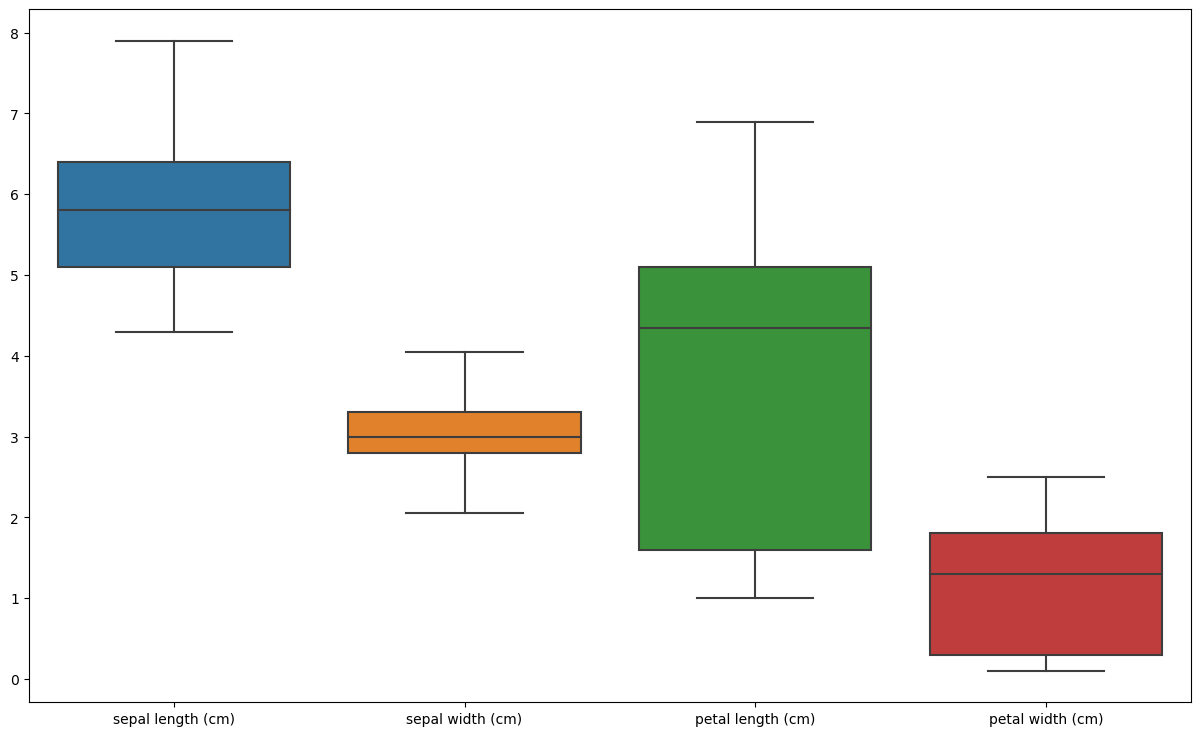

In [17]:
plt.figure(figsize=[15,9])
sns.boxplot(data=df)
plt.show()

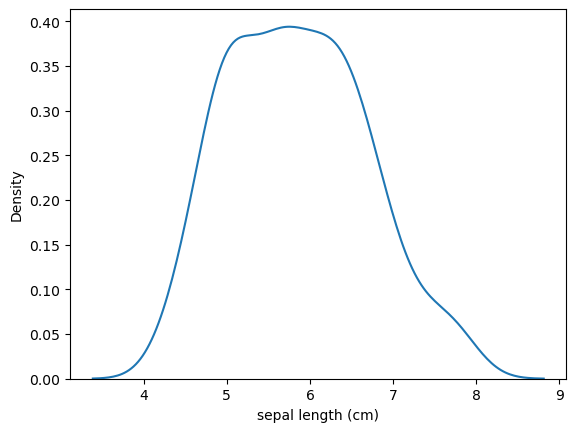

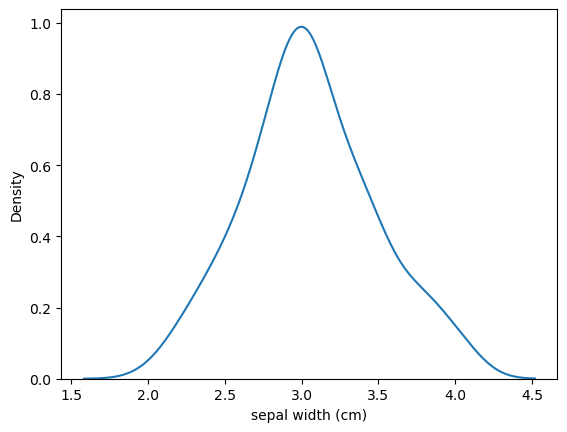

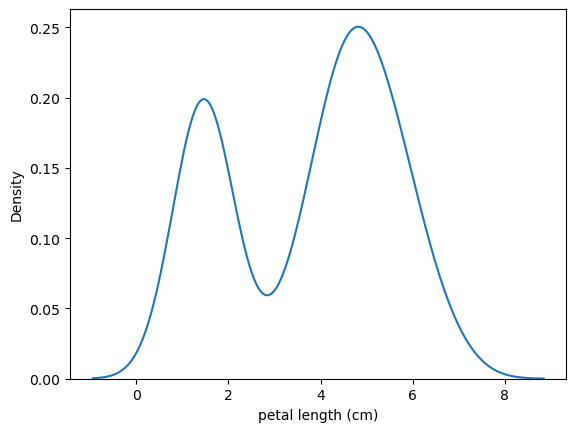

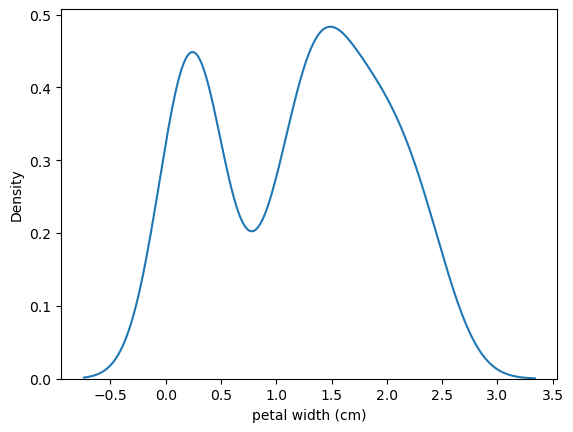

In [18]:
#Distribution Plot

cols1=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

for cols in cols1:
    sns.kdeplot(data=df[cols])
    plt.show()

In [19]:
#Encoding Categorical Variables

df['species']=df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
#Separating dependent and independent variables

X=df.drop('species',axis=1)
y=df['species']

In [22]:
X.shape,y.shape

((150, 4), (150,))

In [23]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [24]:
#Train and test split

X_train,X_test,y_train,y_test=train_test_split(X,dummy_y,test_size=0.20,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [25]:
#Scaling the data

mn=MinMaxScaler()
X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

In [26]:
#Model Building

In [27]:
classifier=Sequential()

In [28]:
X_train_scaled.shape,y_train.shape

((120, 4), (120, 3))

In [29]:
classifier.add(Dense(8,kernel_initializer='uniform',activation='relu',input_dim=4))
classifier.add(Dense(3,kernel_initializer='uniform',activation='softmax'))

In [30]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_train_scaled.shape,y_train.shape

((120, 4), (120, 3))

In [33]:
es=EarlyStopping(monitor='loss',patience=3)

In [34]:
callback=classifier.fit(X_train_scaled,y_train,batch_size=5,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=es)

Epoch 1/100
24/24 [==============================] - 2s 23ms/step - loss: 1.0975 - accuracy: 0.3667 - val_loss: 1.0960 - val_accuracy: 0.3667
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 1.0940 - accuracy: 0.3667 - val_loss: 1.0912 - val_accuracy: 0.3667
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 1.0875 - accuracy: 0.3667 - val_loss: 1.0827 - val_accuracy: 0.3667
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 1.0773 - accuracy: 0.4000 - val_loss: 1.0705 - val_accuracy: 0.4833
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 1.0642 - accuracy: 0.4000 - val_loss: 1.0538 - val_accuracy: 0.4167
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 1.0460 - accuracy: 0.4750 - val_loss: 1.0339 - val_accuracy: 0.5917
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 1.0256 - accuracy: 0.6583 - val_loss: 1.0113 - val_accuracy: 0.6667
Epoch 8/100


Epoch 59/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3912 - accuracy: 0.8833 - val_loss: 0.3887 - val_accuracy: 0.8917
Epoch 60/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3874 - accuracy: 0.8750 - val_loss: 0.3852 - val_accuracy: 0.8750
Epoch 61/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3847 - accuracy: 0.8833 - val_loss: 0.3819 - val_accuracy: 0.8750
Epoch 62/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3820 - accuracy: 0.9000 - val_loss: 0.3783 - val_accuracy: 0.9083
Epoch 63/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3770 - accuracy: 0.9000 - val_loss: 0.3750 - val_accuracy: 0.8917
Epoch 64/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.8917 - val_loss: 0.3718 - val_accuracy: 0.8917
Epoch 65/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.9000 - val_loss: 0.3685 - val_accuracy: 0.9083
Epoch 

In [35]:
y_pred_train=classifier.predict(X_train_scaled)

4/4 [==============================] - 0s 5ms/step


In [36]:
y_pred_test=classifier.predict(X_test_scaled)

1/1 [==============================] - 0s 45ms/step


In [37]:
y_pred_train=np.round(y_pred_train)

In [38]:
y_pred_test=np.round(y_pred_test)

In [39]:
print('Model Train Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Model test Accuracy is: ',accuracy_score(y_test,y_pred_test))
print('Model Recall_score is: ',recall_score(y_test,y_pred_test,average='weighted'))
print('Model Precision_score is: ',precision_score(y_test,y_pred_test,average='weighted'))
print('Model f1_score is: ',f1_score(y_test,y_pred_test,average='weighted'))

Model Train Accuracy is:  0.95
Model test Accuracy is:  0.9666666666666667
Model Recall_score is:  0.9666666666666667
Model Precision_score is:  0.9714285714285714
Model f1_score is:  0.9672820512820512


In [40]:
callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

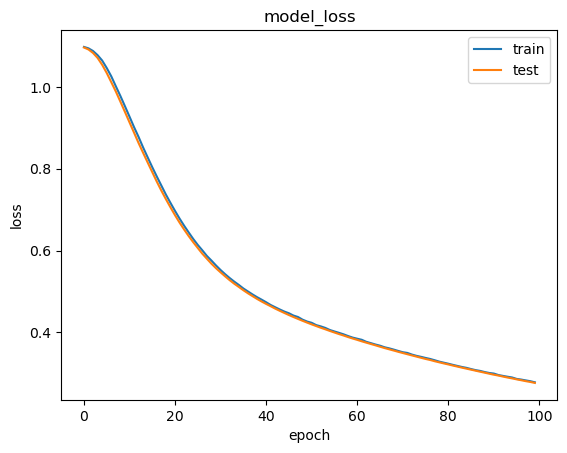

In [41]:
plt.plot(callback.history['loss'])
plt.plot(callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

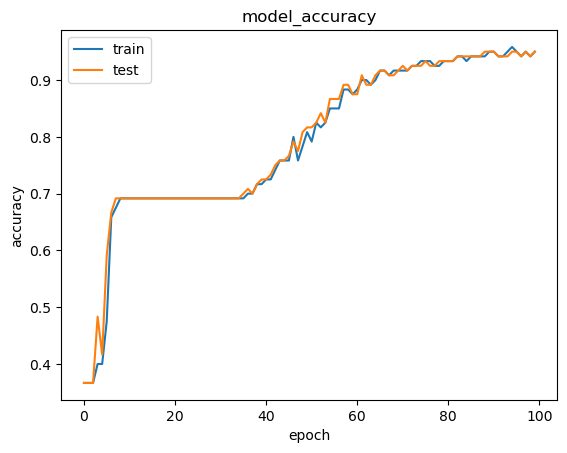

In [42]:
plt.plot(callback.history['accuracy'])
plt.plot(callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

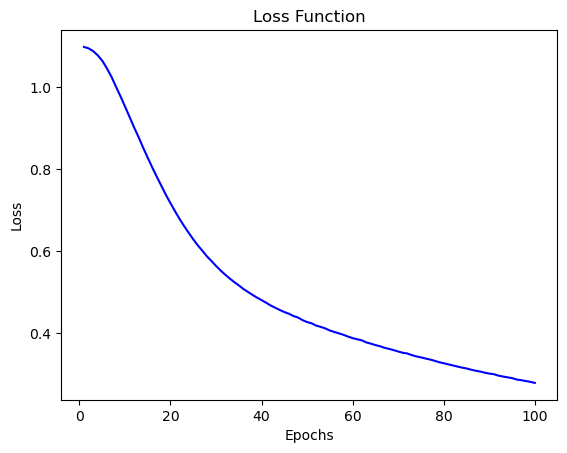

In [43]:
# Extract the loss from the history
loss = callback.history['loss']

# Plot the loss function
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [44]:
final_parameters = []

# Iterate over each layer in the model
for layer in classifier.layers:
    # Retrieve the weights and biases of the layer
    layer_weights = layer.get_weights()
    final_parameters.append(layer_weights)

# Print the final parameter values for each layer
for i, parameters in enumerate(final_parameters):
    print(f"Layer {i + 1} - Weights Shape: {parameters[0].shape}, Biases Shape: {parameters[1].shape}")
    print("Weights:")
    print(parameters[0])
    print("Biases:")
    print(parameters[1])
    print()

Layer 1 - Weights Shape: (4, 8), Biases Shape: (8,)
Weights:
[[ 6.20050669e-01 -2.77791377e-02  6.75269008e-01  4.97486442e-03
   9.47589651e-02 -1.51394885e-02  1.06299622e-02  6.98686421e-01]
 [-2.40013078e-01 -3.63693126e-02 -2.63693154e-01 -3.17363366e-02
   1.12260377e+00  5.54857892e-04 -5.11212088e-02 -2.89577544e-01]
 [ 1.00283813e+00  3.92386429e-02  1.04491270e+00 -4.93623018e-02
  -7.74020553e-01 -3.10405940e-02  7.01285526e-03  1.08868361e+00]
 [ 1.18267763e+00 -3.91772874e-02  1.17962396e+00  2.06004642e-02
  -1.14501321e+00 -8.20564572e-04 -2.09459104e-02  1.23562491e+00]]
Biases:
[-0.18579331  0.         -0.1786885   0.          1.327746   -0.01109695
 -0.0103669  -0.17379849]

Layer 2 - Weights Shape: (8, 3), Biases Shape: (3,)
Weights:
[[-1.429983    0.06285403  0.57688475]
 [ 0.03748068  0.04589346  0.04628743]
 [-1.3981103   0.09726243  0.5672563 ]
 [ 0.00689896 -0.04306279 -0.04351223]
 [ 1.5804012  -0.06802545 -2.1458933 ]
 [-0.01712993 -0.0043772  -0.03561551]
 [ 